# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2 Linear regression with one variable

In [2]:
data = np.loadtxt("ex1data1.txt", delimiter=',')

In [3]:
X = data[:, 0][:, np.newaxis]
y = data[:, 1]

### 2.1 Plotting the Data

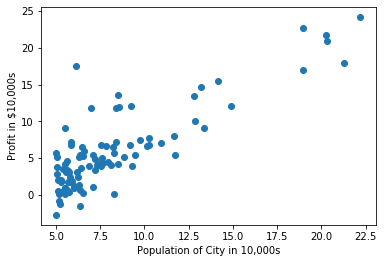

In [4]:
plt.figure()
plt.scatter(X[:, 0], y)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

### 2.2 Gradient Descent

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)})^2}$$
$$h_{\theta}(x) = \theta^T x = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

In [5]:
def computeCost(X, y, theta):
    h = np.dot(X, theta) - y
    J = np.dot(h, h) / (2 * X.shape[0])
    return J

In [6]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0])
print(computeCost(X_train, y, theta))  # 32.07

32.072733877455676


In [7]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([-1, 2])
print(computeCost(X_train, y, theta))  # 54.24

54.24245508201238


$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}_j}$$

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / X.shape[0])
                 * np.dot(X.T, (np.dot(X, theta) - y)))   
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

In [9]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0])
alpha = 0.01
num_iters = 1500
theta, J_history = gradientDescent(X_train, y, theta, alpha, num_iters)
print(theta)  # -3.6303 1.1664

[-3.63029144  1.16636235]


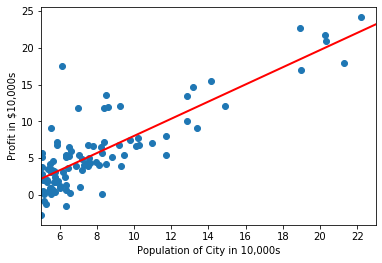

In [10]:
plt.figure()
plt.scatter(X[:, 0], y)
X_plot = np.linspace(5, 23, 100)
plt.plot(X_plot, theta[0] + X_plot * theta[1],
         color="red", linewidth=2)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.xlim(5, 23)
plt.show()

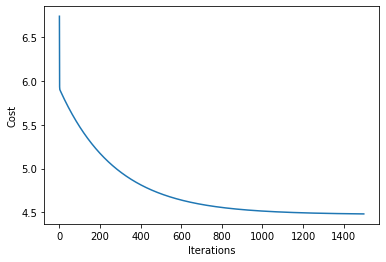

In [11]:
plt.figure()
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [12]:
theta[0] + 3.5 * theta[1]

0.4519767867701767

In [13]:
theta[0] + 7 * theta[1]

4.534245012944712

## 3 Linear regression with multiple variables

In [14]:
data = np.loadtxt("ex1data2.txt", delimiter=',')

In [15]:
X = data[:, [0, 1]]
y = data[:, 2]

In [16]:
X[:5]

array([[2.104e+03, 3.000e+00],
       [1.600e+03, 3.000e+00],
       [2.400e+03, 3.000e+00],
       [1.416e+03, 2.000e+00],
       [3.000e+03, 4.000e+00]])

In [17]:
y[:5]

array([399900., 329900., 369000., 232000., 539900.])

### 3.1 Feature Normalization

In [18]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, ddof=1, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [19]:
X_train, mu, sigma = featureNormalize(X)
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

### 3.2 Gradient Descent

In [20]:
def computeCostMulti(X, y, theta):
    h = np.dot(X, theta) - y
    J = np.dot(h, h) / (2 * X.shape[0])
    return J

In [21]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / X.shape[0])
                 * np.dot(X.T, (np.dot(X, theta) - y)))   
        J_history[i] = computeCostMulti(X, y, theta)
    return theta, J_history

In [22]:
theta = np.zeros(3)
alpha = 0.01
num_iters = 400
theta, J_history = gradientDescent(X_train, y, theta, alpha, num_iters)
print(theta)

[334302.06399328 100087.11600585   3673.54845093]


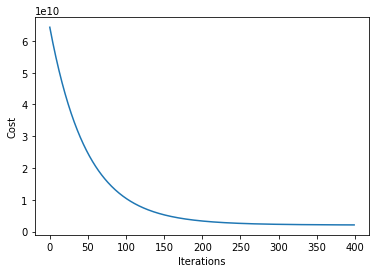

In [23]:
plt.figure()
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [24]:
price = 0
price = price + theta[0]
price = price + theta[1] * (1650 - mu[0]) / sigma[0]
price = price + theta[2] * (3 - mu[1]) / sigma[1]
print(price)

289314.6203377763


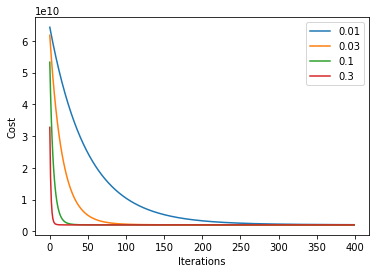

In [25]:
# different learning rates
alphas = [0.01, 0.03, 0.1, 0.3]
plt.figure()
for alpha in alphas:
    theta = np.zeros(3)
    num_iters = 400
    theta, J_history = gradientDescent(X_train, y, theta, alpha, num_iters)
    plt.plot(np.arange(num_iters), J_history, label=str(alpha))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

### 3.3 Normal Equations

$$\theta =(X^T X)^{-1} X^T y$$

In [26]:
data = np.loadtxt("ex1data2.txt", delimiter=',')
X = data[:, [0, 1]]
y = data[:, 2]
X_train = np.hstack((np.ones((X.shape[0], 1)), X))

In [27]:
def normalEqn(X, y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)

In [28]:
theta = normalEqn(X_train, y)
print(theta)

[89597.90954355   139.21067402 -8738.01911255]


In [29]:
price = 0
price = price + theta[0]
price = price + theta[1] * 1650
price = price + theta[2] * 3
print(price)

293081.4643349715
